In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
ALPHA = 0.001
EPHOCHS = 200

In [3]:
rng = np.random.default_rng(seed = 0)

In [4]:
X,y = datasets.make_moons(n_samples=1000, noise=0.2, random_state= 23)

In [5]:
data_df = pd.DataFrame(X, columns=['X1','X2'])

In [6]:
data_df['target'] = y

In [7]:
data_df

,X1,X2,target
0,-0.029033,0.253046,1
1,1.288946,-0.079415,1
2,0.155971,0.879749,0
3,0.032590,0.487471,1
4,2.285296,0.462694,1
...,...,...,...
995,1.762311,0.047648,1
996,2.643058,0.351860,1
997,0.909781,0.265390,0
998,0.940364,-0.281355,1


In [8]:
train_data = data_df.to_numpy()[:900]
test_data = data_df.to_numpy()[900:]

In [9]:
features = X.shape
features

(1000, 2)

In [10]:
def predict(row, weights):
    
    bias = weights[0]
    
    z = ((row[0]*weights[1]) + (row[1]*weights[2])) + bias
    
    threshold = 0
    
    if(z >= threshold):
        z =1
    else:
        z = 0
    
    return z    

In [11]:
def build_model(train, alpha = ALPHA, epochs = EPHOCHS):
    
    weights = rng.random(features[1]+1)
    
    m = train.shape[0]
    
    error_lst = []
    
    for epoch in range(epochs):
        
        total_error = 0
        
        for row in train:
            
            #-------------------------
            # forward propogation
            #-------------------------
            
            prediction = predict(row, weights)
            
            error = prediction - row[-1]
            
            sum_error = (prediction - row[-1])**2
            
            total_error += sum_error
            
            #-------------------------
            # back tracking
            #-------------------------
            
            weights[1] = weights[1] - (alpha/(m))*error
            
            weights[0] = weights[0] - (alpha/m)*(error*row[0])
            
            weights[2] = weights[2] - (alpha/m)*(error*row[1])
            
        error_lst.append(total_error/m)
    
    return weights[0], weights[2], weights[1], error_lst

In [12]:
W1, W2, bias, error = build_model(train_data, alpha=ALPHA, epochs=EPHOCHS)

In [13]:
W1

0.6380920129748189

In [14]:
W2

-0.022966749604463228

In [15]:
bias

0.1695644915409915

In [16]:
error

[0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111111111,
 0.5011111111

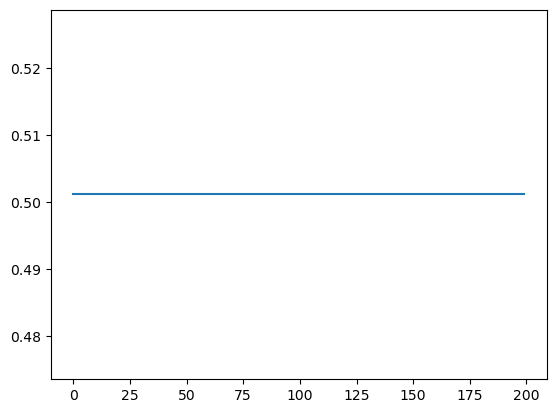

In [19]:
plt.plot(error);